In [ ]:
from labjack_device import LabJackDevice
from _ljm_aux import *

lj_device = LabJackDevice(
        device_type=LabJackDeviceTypeEnum.T7,
        connection_type=LabJackConnectionTypeEnum.ETHERNET,
        device_identifier='192.168.1.92',
    )

# # working
# stream_in = lj_device.stream_in(["AIN0", "AIN1"], 10, sampling_rate_Hz=50e3, scans_per_read=50000)
# working
stream_in = lj_device.stream_in(["AIN0", "AIN1"], 10, sampling_rate_Hz=50e3)
# # too high sampling rate
# stream_in = lj_device.stream_in(["AIN0", "AIN1"], 10, sampling_rate_Hz=100e3, scans_per_read=50000)

Exception ignored in: <function LabJackDevice.__del__ at 0x000002717EB21260>
Traceback (most recent call last):
  File "h:\Codes\labjack_T7_monitor_developement\LabJack_class\labjack_device.py", line 156, in __del__
    self.__exit__(None, None, None)
  File "h:\Codes\labjack_T7_monitor_developement\LabJack_class\labjack_device.py", line 147, in __exit__
    self._disconnect()
  File "h:\Codes\labjack_T7_monitor_developement\LabJack_class\labjack_device.py", line 124, in _disconnect
    raise LabJackDisconnectionError("LabJack library-level error") from ljmex
_ljm_aux.LabJackDisconnectionError: LabJack library-level error


>>> Connecting to LabJack... Done. Execution time: 0.005682 s

LabJack device instance:
	Device type: T7
	Connection type: ETHERNET
	IP address: 192.168.1.92, Port: (502,)
	Serial number: 470033665
	Max bytes per MB: 1040

>>> Configuring LabJack for streaming... Done. Execution time: 0.001007 s

>>> Disconnecting LabJack (SN: 470033665)... 

>>> Streaming starting... Started.


>>> Stopping Stream...

	eStreamRead 1 out of 1 returned at 2025-03-26 11:19:55.802236.
		Scans Skipped across channels = 0, Scan Backlogs: Device = 5, LJM = 368

<<< Stream stopped.

	# scans = 500000 total, 250000/channel	Skipped scans across channels = 0



In [22]:
print(stream_in)
print()
total_nans = np.sum([np.isnan(value['V']).sum() for value in stream_in.records.values()])
print(f"Recounting skipped total samples = {total_nans}")
del lj_device

Labjack streamed read data:
	records = 
		{'AIN0': {'V': array([10.10502052,  4.30618286,  2.07505918, ..., -0.28106913,
		       -0.28170055, -0.28170055], shape=(250000,)),
		          't': array([0.000000e+00, 8.000000e-05, 1.600000e-04, ..., 1.999976e+01,
		       1.999984e+01, 1.999992e+01], shape=(250000,))},
		 'AIN1': {'V': array([0.00118161, 0.00118161, 0.00086586, ..., 0.00118161, 0.0005501 ,
		       0.00118161], shape=(250000,)),
		          't': array([4.000000e-05, 1.200000e-04, 2.000000e-04, ..., 1.999980e+01,
		       1.999988e+01, 1.999996e+01], shape=(250000,))}}
	duration = 10.0 s
	sampling rate = 50000.0 total samples/s, 25000.0 samples/s/channel
	triggered = False

Recounting skipped total samples = 0


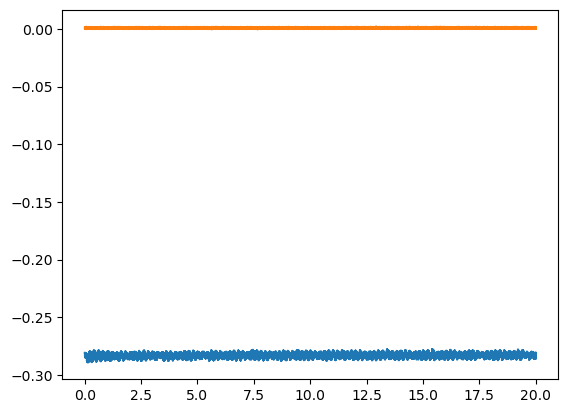

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
n_skip_head = 100
for channel, record in stream_in.records.items():
    ax.plot(record["t"][n_skip_head:], record["V"][n_skip_head:], label=channel)

    